In [14]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
import astropy.units as u
from astropy import table
from astropy.coordinates import *
from astroquery.irsa import Irsa
from astropy.table import Table

import astropy.units as u
from astropy.coordinates import SkyCoord

from astroquery.sdss import SDSS
from astroquery.mast import Catalogs

In [15]:
def add_coord_to_tab(tab, raname='RA', decname='Dec', unit=u.deg, coocolname='coord'):
    coo = SkyCoord(ra=tab[raname], dec=tab[decname], unit=unit, frame='icrs')
    tab[coocolname] = coo
    return coo

(array([425., 183., 276., 163.,  82.,  42.,  46.,  14.,   9.,  19.]),
 array([-5.84899972e-04,  1.97238046e-01,  3.95060993e-01,  5.92883939e-01,
         7.90706885e-01,  9.88529831e-01,  1.18635278e+00,  1.38417572e+00,
         1.58199867e+00,  1.77982162e+00,  1.97764456e+00]),
 <BarContainer object of 10 artists>)

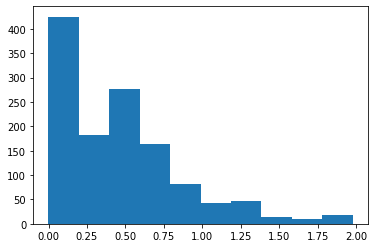

In [16]:
with fits.open('https://archive.stsci.edu/missions/hlsp/uvqs/hlsp_uvqs_multi_multi_all_multi_v1_redshifts.fits', 
              cache=True) as f:
    uvqs_tab = table.Table.read(f)
add_coord_to_tab(uvqs_tab, raname='RA', decname='DEC')

# JT recommended this cut
uvqs_good_tab = uvqs_tab[uvqs_tab['Z_QUAL']>=3]
plt.hist(uvqs_tab['Z'])


In [17]:
fuv=uvqs_good_tab['FUV']
nuv=uvqs_good_tab['NUV']

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

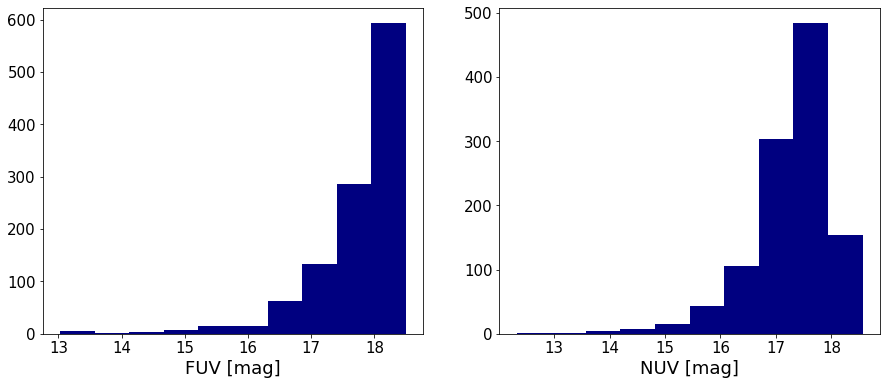

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.hist(fuv, color='navy')

plt.xlabel("FUV [mag]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.subplot(122)
plt.hist(nuv,color='navy')
plt.xlabel("NUV [mag]",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([12., 13., 14., 15., 16., 17., 18., 19.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

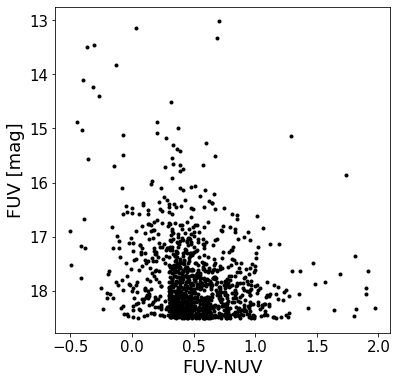

In [19]:
plt.figure(figsize=(6,6))
plt.plot(fuv-nuv,fuv, 'o', ms=3, color='k')
plt.xlabel("FUV-NUV", fontsize=18)
plt.ylabel("FUV [mag]", fontsize=18)
plt.gca().invert_yaxis()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [20]:

ra = Angle(uvqs_good_tab['RA'])
ra = ra.wrap_at(180*u.degree)
dec = Angle(uvqs_good_tab['DEC'])

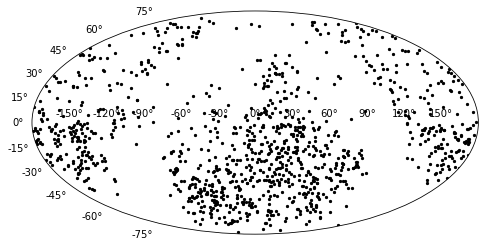

In [21]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian, c='k', s=5)

In [19]:
w1,w2=uvqs_good_tab['W1'],uvqs_good_tab['W2']

(array([ 4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

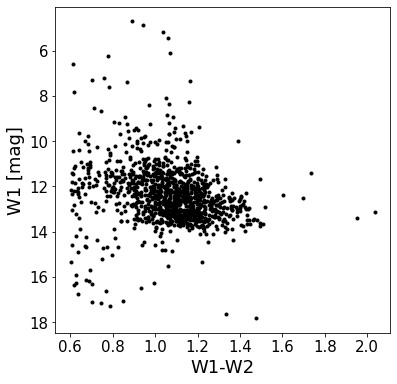

In [20]:
plt.figure(figsize=(6,6))
plt.plot(w1-w2,w1, 'ko', ms=3)
plt.xlabel("W1-W2", fontsize=18)
plt.ylabel("W1 [mag]",fontsize=18)
plt.gca().invert_yaxis()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [21]:
##unWISE catalogue
#Irsa.list_catalogs()   #unwise_2019


In [22]:
#cross match with COS qso
ra0,dec0=ra[0],dec[0]
print(ra0,dec0)

0d00m02.25s -20d04m27.7s


In [23]:
t = Table()

In [24]:
#crossmatch the allwise objects with qso table 

wiseTab = Table() # all wqso with wise coloours
i=0
for ra0,dec0 in zip(ra,dec):
    table= Irsa.query_region(SkyCoord(ra0,dec0, unit=(u.deg,u.deg),),
                       catalog='allwise_p3as_psd', radius='0d2m0s',selcols="ra,dec,w1mpro,w2mpro,w3mpro,w4mpro")
    #print(table[0])
    if i == 0:
        wiseTab = Table(table[0])
    else:
        wiseTab.add_row(table[0])
    i+=1
    
#print(wiseTab)    

mag_mask = wiseTab['w4mpro'] < 6.55
wise_magcut=wiseTab[mag_mask]

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(wiseTab['w1mpro']-wiseTab['w2mpro'], wiseTab['w3mpro']-wiseTab['w4mpro'], s=15, c='k', label="all (1121)")
plt.xlabel("W1 [3.4] - W2 [4.6]", fontsize=17)
plt.ylabel("W3 [12] - W4 [22]",fontsize=17)

cut=np.size(wise_magcut['w1mpro'])
plt.scatter(wise_magcut['w1mpro']-wise_magcut['w2mpro'], wise_magcut['w3mpro']-wise_magcut['w4mpro'], s=15,facecolor='None',edgecolor='cyan',label="W4 > 20 mJy ("+str(cut)+")" )

plt.xlim([-0.5, 3.0])
plt.ylim([-1, 8])
plt.axhline(1.9,xmin=0.347, c='r', lw=3)
plt.axvline(0.7, c='r', ymin=0.321, lw=3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(wiseTab['w1mpro']-wiseTab['w2mpro'], wiseTab['w3mpro']-wiseTab['w4mpro'], s=25, c='k', label="all (1121)")
plt.xlabel("W1 [3.4] - W2 [4.6]", fontsize=17)
plt.ylabel("W3 [12] - W4 [22]",fontsize=17)

plt.scatter(wise_magcut['w1mpro']-wise_magcut['w2mpro'], wise_magcut['w3mpro']-wise_magcut['w4mpro'], s=25,facecolor='None',edgecolor='cyan',lw=1.2, label="W4 > 20 mJy ("+str(cut)+")" )
plt.xlim([0.0, 2.0])
plt.ylim([0,4])
plt.axhline(1.9,xmin=0.35, c='r', lw=3)
plt.axvline(0.7, c='r', ymin=0.48, lw=3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

In [ ]:
plt.figure(figsize=(6,6))

plt.scatter(w1-w2,w1, s=25, c='k', label="all"           )
plt.scatter(wise_magcut['w1mpro']-wise_magcut['w2mpro'],wise_magcut['w1mpro'] , facecolor='None',edgecolor='cyan',lw=1.2, s=25,color='cyan', label="W4 > 20 mJy")

plt.xlabel("W1-W2", fontsize=18)
plt.ylabel("W1 [mag]",fontsize=18)
plt.gca().invert_yaxis()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

In [ ]:
print(wiseTab[0])

In [1]:
import os

In [2]:
os.remove(saga.database["host_stats"].local.path)
saga.database["host_stats"].clear_cache()

NameError: name 'saga' is not defined

### Import SAGA

In [22]:
import SAGA
print(SAGA.__version__)
saga = SAGA.QuickStart()
hosts = saga.host_catalog.load(include_stats=True)
assert saga.good.count(hosts) == 134
assert saga.paper3.count(hosts) == 100


0.49.5
SAGA `shared_dir` set to /Users/ahamanowicz/Desktop/COS-SAGA
SAGA `local_dir`  set to /Users/ahamanowicz/Desktop/COS-SAGA


In [23]:
hosts = saga.host_catalog.load(query="paper3",include_stats=True)

In [6]:
hosts

HOSTID,PGC,SAGA_NAME,COMMON_NAME,NSAID,NSA1ID,RA,DEC,GLON,GLAT,V_HELIO,V_VIRGO,Z_COSMO,Z_HELIO,DIST,DISTMOD,K_RAW,K_TC,K_ABS,M_HALO,REMOVED_BY_HAND,SGA_ID,MORPHTYPE,BRIGHTEST_K_R1,BRIGHTEST_K_R2,BRIGHTEST_K_BG_R1,BRIGHTEST_K_BG_R2,BRIGHTEST_STAR_R1,STAR_DENSITY_R1,BRIGHTEST_STAR_R2,STAR_DENSITY_R2,COVERAGE_DECALS_DR5,COVERAGE_DECALS_DR6,COVERAGE_DECALS_DR7,COVERAGE_DECALS_DR8,COVERAGE_DECALS_DR9,COVERAGE_DES_DR1,COVERAGE_SDSS,HOST_SCORE,HAS_IMAGE,NEAREST_MW,NEAREST_MW_DIST,NEAREST_MW_SEP,NEARBY_MW_COUNT_1,NEARBY_MW_COUNT_1.5,NEARBY_MW_COUNT_2,need_spec,need_spec_griz,really_need_spec,really_need_spec_strict,really_need_spec_bright,paper2_need_spec,paper2_total,paper3_need_spec,paper3_total,specs_total,specs_r_limit,specs_Mr_limit,specs_bright,specs_ours,specs_ours_r_limit,specs_ours_Mr_limit,specs_ours_bright,sats_total,sats_r_limit,sats_Mr_limit,sats_bright,sats_ours,sats_ours_r_limit,sats_ours_Mr_limit,sats_ours_bright,low_z_total,low_z_ours,specs_main,specs_main_bright,specs_ours_rvir,specs_ours_main,specs_ours_main_bright,specs_ours_aat,specs_ours_mmt,sats_missed_approx,sats_missed_corrected,coord
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"deg,deg"
str10,int64,str13,str22,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str9,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,object
nsa126115,279,Bandamanna,NGC7817,126115,613769,0.995382,20.7523559,108.2284018,-40.7605243,2309.4,2379.7,0.007509265978,0.007703329215,32.35243745,32.54953503,8.4,8.413236622,-24.13629841,12.22914145,0,1359702,Sbc,99.0,99.0,99.0,10.04360438,7.6193,0.0,8.1267,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,4,2,nsa153017,1.796472819,1.065293456,0,0,1,241,240,10,10,0,10,87,10,86,1295,1106,1093,112,818,719,788,41,3,3,3,1,2,2,2,0,6,3,77,9,595,71,4,0,810,0.1740351332,0.1740351332,"0.995382,20.7523559"
nsa127226,2081,,NGC0157,127226,614858,8.694936,-8.3964957,110.2762933,-70.8578303,1655.1,1566.9,0.006427784722,0.00552081934,27.66941645,32.21,7.665,7.679767546,-24.53023245,12.20914145,0,895869,SABb,99.0,99.0,10.34780753,9.609372536,8.1775,0.0,8.2894,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,4,2,nsa128381,5.463821353,7.379299229,0,0,0,799,790,14,6,0,14,137,14,136,1018,980,852,283,595,582,590,152,4,4,4,4,4,4,4,4,11,9,123,28,383,117,22,593,0,0.2286713338,0.2286713338,"8.694936,-8.3964957"
nsa129237,4948,HarryPotter,UGC00903,129237,642806,20.449089,17.5923332,133.1301924,-44.6774064,2516.9,2526.1,0.008907581528,0.008395474712,38.41916827,32.92273979,9.38,9.387652562,-23.53508723,11.93114145,0,606775,Sbc,99.0,99.0,99.0,10.97530766,99.0,0.0,6.6762,0.5300207559,0.0,0.0,1.0,1.0,1.0,0.0,1.0,4,2,nsa129387,3.326463955,4.706852003,0,0,0,197,189,10,10,0,10,80,10,79,1077,894,749,109,478,440,465,42,5,5,5,2,4,4,4,1,8,4,70,16,443,64,11,0,472,0.4181217147,0.4181217147,"20.449089,17.5923332"
nsa129387,5139,,NGC0514,129387,616965,21.016287,12.9173768,135.1453719,-49.1790774,2471.0,2455.8,0.008633319965,0.008242368792,37.22821276,32.85436094,9.131,9.122725462,-23.73163547,11.91414145,0,428108,SABc,99.0,99.0,99.0,11.05657848,9.6073,0.0,7.1374,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,4,2,nsa154122,2.485113141,3.748710966,0,0,0,224,221,3,3,0,3,53,3,53,1221,1025,834,142,439,411,436,27,1,1,1,0,1,1,1,0,2,1,50,10,436,46,6,0,433,0.04946206534,0.04946206534,"21.016287,12.9173768"
nsa130133,6110,,NGC0636,130133,617694,24.7772265,-7.5126485,155.0645103,-67.3608129,1854.7,1732.6,0.006781720618,0.006186613274,29.20115301,32.327,8.428,8.443626413,-23.88337359,12.25914145,0,313714,E,99.0,8.553966443,11.30466977,10.86028346,8.5195,0.0,7.8013,0.0,1.0,0.0,1.0,1.0,1.0

In [24]:
saga_qso = Table(names=("saga_lp", "HOSTID", "qso_lp", "QSO", "sep", "RA", "DEC", "r_mag"), dtype=("int", "str", "int", "str", "float", "float", "float", "float"))
                 
                 

In [25]:
for j in range(np.size(hosts['RA'])):
    c = SkyCoord(hosts['RA'][j]*u.deg, hosts['DEC'][j]*u.deg)
    print(j,hosts['HOSTID'][j])
    for i in range(np.size(uvqs_good_tab['RA'])):
        oc = SkyCoord(uvqs_good_tab['RA'][i]*u.deg, uvqs_good_tab['DEC'][i]*u.deg)
        sep = oc.separation(c)
        
        if sep.degree < 1.:
            print(uvqs_good_tab['NAME'][i], uvqs_good_tab['RA'][i], uvqs_good_tab['DEC'][i])
            saga_qso.add_row((j,hosts['HOSTID'][j], i,  uvqs_good_tab['NAME'][i], sep.degree,uvqs_good_tab['RA'][i], uvqs_good_tab['DEC'][i], 0.0) )
            
            
            

0 nsa126115
1 nsa127226
UVQSJ003236.59-091026.4 8.152458333333334 -9.174
2 nsa129237
3 nsa129387
4 nsa130133
5 nsa132339
6 nsa132368
7 nsa133115
8 nsa133141
9 nsa133355
10 nsa133549
11 nsa135296
12 nsa135591
13 nsa135739
14 nsa13927
15 nsa139467
16 nsa140458
17 nsa141315
18 nsa141465
19 nsa143856
UVQSJ134426.41+441620.1 206.11004166666666 44.27225
20 nsa14409
21 nsa144151
22 nsa144953
23 nsa145297
24 nsa145372
25 nsa145729
26 nsa145879
27 nsa146486
28 nsa147100
29 nsa147606
UVQSJ170043.71+223700.2 255.182125 22.616722222222222
30 nsa149781
31 nsa149977
32 nsa150307
33 nsa150578
34 nsa150887
35 nsa153017
36 nsa155005
UVQSJ022218.03-062511.1 35.575125 -6.4197500000000005
37 nsa157300
UVQSJ092816.20+084139.2 142.0675 8.694222222222223
38 nsa157374
39 nsa158901
40 nsa159593
41 nsa160302
42 nsa161174
43 nsa16235
44 nsa163956
45 nsa164865
46 nsa165162
47 nsa165316
48 nsa165536
49 nsa16559
50 nsa165707
51 nsa165956
52 nsa165980
53 nsa166313
54 nsa169439
55 nsa32
56 nsa33446
57 nsa3469
UVQSJ12

In [26]:

print(np.size(saga_qso['RA']))
      # querry the SDSS photometry
for i in range(np.size(saga_qso['RA'])):
    coo = SkyCoord(saga_qso['RA'][i]*u.deg, saga_qso['DEC'][i]*u.deg)
    #print(coo)
    xid=SDSS.query_crossid(coo, photoobj_fields=['modelMag_g', 'modelMag_i', 'modelMag_r'])
    #print(xid)
    if xid != None:
        r_mag = xid['modelMag_r'][0]
        print(r_mag)

13
15.31404
15.10803
17.3198
16.82885
13.82022


/Users/ahamanowicz/opt/anaconda3/envs/astro/lib/python3.8/site-packages/astroquery/sdss/core.py:862: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/Users/ahamanowicz/opt/anaconda3/envs/astro/lib/python3.8/site-packages/astropy/table/table.py:3075: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


## SAGA WISE 

In [27]:
# #SAGA catalogue
# import SAGA
# saga = SAGA.QuickStart()
# hosts = saga.host_catalog.load(include_stats=True)

# #satellites
# from SAGA.database import FitsTable
# sats_url = "https://www.dropbox.com/sh/7qeuqkq0c591k2g/AAC0c5C7erNCp0nYOhcDv9kva/saga_sats_latest.fits?dl=1"
# sats = FitsTable(sats_url).read()

# hosts.columns

In [28]:
saga_qso = Table(names=("saga-host", "saga-RA", "saga-DEC", "galex-name", "RA-galex", 
                        "DEC-galex", "FUV", "NUV", "RA-wise", "DEC-wise", "W1", "W2", "W3", "W4"), 
                 dtype=( "str", "float", "float","str", "float", "float", "float", "float","float",
                        "float","float","float","float","float"))


In [29]:
#crossmatch the Galex cataogue with SAGA objects
# choose obejcts wthing 1 degree
M = np.size(hosts['RA'])

#restart from 40
for j in range(np.size(hosts['RA'])):
    #implement palomar limits
    if hosts['DEC'][j] > -20:
        if (hosts['RA'][j] > 1*15) |  (hosts['RA'][j] < 15*15) :
            c = SkyCoord(hosts['RA'][j]*u.deg, hosts['DEC'][j]*u.deg)
            co = str(c.ra.deg)+" "+str(c.dec.deg)
            print(str(j+1) +"/" +  str(M))
            galex_table = Catalogs.query_region(c, radius=1, catalog='Galex', selcols="ra,dec,fuv_mag,nuv_mag")

            fuv_mask = (galex_table['fuv_mag'] < 19 ) 
            galex_fuv_cut = galex_table[fuv_mask]

            for i in range (np.size(galex_fuv_cut['fuv_mag'])): #match with WISE objects
                if galex_fuv_cut['fuv_mag'][i] != "--":
                    wiseTab = Table() 
                    ra0,dec0 = galex_fuv_cut['ra'][i],galex_fuv_cut['dec'][i]

                    table= Irsa.query_region(SkyCoord(ra0,dec0, unit=(u.deg,u.deg),),
                                catalog='allwise_p3as_psd', radius='0d2m0s',selcols="ra,dec,w1mpro,w2mpro,w3mpro,w4mpro")


                    saga_qso.add_row((hosts['HOSTID'][j], hosts['RA'][j],hosts['DEC'][j], galex_fuv_cut['objID'][i], 
                                      galex_fuv_cut['ra'][i], galex_fuv_cut['dec'][i], galex_fuv_cut['fuv_mag'][i], 
                                      galex_fuv_cut['nuv_mag'][i], table['ra'][0], table['dec'][0], table['w1mpro'][0],
                                      table['w2mpro'][0], table['w3mpro'][0], table['w4mpro'][0]))





1/100


KeyboardInterrupt: 

In [70]:
#do for ALL SAGA hosts
#crossmatch the Galex cataogue with SAGA objects
# choose obejcts wthing 1 degree
M = np.size(hosts['RA'])


for j in range(50,101):
    #implement palomar limits
    c = SkyCoord(hosts['RA'][j]*u.deg, hosts['DEC'][j]*u.deg)
    co = str(c.ra.deg)+" "+str(c.dec.deg)
    print(str(j+1) +"/" +  str(M))
    galex_table = Catalogs.query_region(c, radius=1, catalog='Galex', selcols="ra,dec,fuv_mag,nuv_mag")

    fuv_mask = (galex_table['fuv_mag'] < 19 ) 
    galex_fuv_cut = galex_table[fuv_mask]

    for i in range (np.size(galex_fuv_cut['fuv_mag'])): #match with WISE objects
        if galex_fuv_cut['fuv_mag'][i] != "--":
            wiseTab = Table() 
            ra0,dec0 = galex_fuv_cut['ra'][i],galex_fuv_cut['dec'][i]

            table= Irsa.query_region(SkyCoord(ra0,dec0, unit=(u.deg,u.deg),),
                        catalog='allwise_p3as_psd', radius='0d2m0s',selcols="ra,dec,w1mpro,w2mpro,w3mpro,w4mpro")


            saga_qso.add_row((hosts['HOSTID'][j], hosts['RA'][j],hosts['DEC'][j], galex_fuv_cut['objID'][i], 
                              galex_fuv_cut['ra'][i], galex_fuv_cut['dec'][i], galex_fuv_cut['fuv_mag'][i], 
                              galex_fuv_cut['nuv_mag'][i], table['ra'][0], table['dec'][0], table['w1mpro'][0],
                              table['w2mpro'][0], table['w3mpro'][0], table['w4mpro'][0]))





51/100
52/100


53/100
54/100
55/100


56/100
57/100
58/100
59/100
60/100


61/100
62/100


63/100
64/100


65/100
66/100
67/100
68/100
69/100
70/100


71/100
72/100
73/100
74/100
75/100
76/100
77/100
78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100
86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100


98/100


99/100
100/100


IndexError: index 100 is out of bounds for axis 0 with size 100

In [71]:
saga_qso.show_in_notebook()

idx,saga-host,saga-RA,saga-DEC,galex-name,RA-galex,DEC-galex,FUV,NUV,RA-wise,DEC-wise,W1,W2,W3,W4
0,nsa126115,0.995382,20.7523559,6375982352315711878,0.9915939666832181,20.95413013088512,18.224123,14.045558,0.991525,20.9536381,6.826,6.988,7.013,7.004
1,nsa126115,0.995382,20.7523559,6375982365200617368,0.9413587466368913,20.27834508726079,15.5141068,14.2920656,0.9419729,20.278455,10.893,10.916,11.01,8.476
2,nsa126115,0.995382,20.7523559,6375982352315713224,1.035753824090042,21.24729739241806,16.2771416,15.7923231,1.0357758,21.2471972,14.237,14.279,12.018,8.635
3,nsa126115,0.995382,20.7523559,3054568783792310666,1.035656186675342,21.24738529885289,16.2719517,15.7876329,1.0357758,21.2471972,14.237,14.279,12.018,8.635
4,nsa126115,0.995382,20.7523559,6375982365200617245,0.8651088155931191,20.15538386357145,18.3421936,18.05785,0.8652257,20.1554198,13.295,12.271,9.788,7.313
5,nsa126115,0.995382,20.7523559,6375982358758164967,0.3429560194442184,20.74880506599254,18.8840065,18.31427,0.3430507,20.7487121,13.326,12.369,9.927,7.712
6,nsa126115,0.995382,20.7523559,6375982364126876148,1.581071189934832,20.20312635326189,15.209712,15.0787773,1.5814004,20.2029512,9.083,8.102,5.718,3.572
7,nsa126115,0.995382,20.7523559,6375982365200616071,0.7582850406832238,19.98578543284453,17.8698463,13.5848417,0.7579512,19.9859342,8.57,8.595,8.588,8.89
8,nsa126115,0.995382,20.7523559,6375982358758164049,0.1439928687507691,20.5456396508816,18.1625824,18.6677952,0.1509329,20.5438889,16.799,16.009,12.168,8.893
9,nsa126115,0.995382,20.7523559,6375982358758165094,0.09314663722267179,20.7970587564972,18.8039131,18.5298576,0.0935345,20.7977209,15.251,15.224,11.884,8.367


In [73]:
### uvqs selection

#uvqs_mask = (saga_qso['FUV']-saga_qso['NUV'] > 0.3) & (saga_qso['W1'] - saga_qso['W2'] > 0.6)
uvqs_mask = (saga_qso['W1'] - saga_qso['W2'] > 0.6)
saga_qso_uvqs = saga_qso[uvqs_mask]
saga_qso_uvqs.show_in_notebook()

idx,saga-host,saga-RA,saga-DEC,galex-name,RA-galex,DEC-galex,FUV,NUV,RA-wise,DEC-wise,W1,W2,W3,W4
0,nsa126115,0.995382,20.7523559,6375982365200617245,0.8651088155931191,20.15538386357145,18.3421936,18.05785,0.8652257,20.1554198,13.295,12.271,9.788,7.313
1,nsa126115,0.995382,20.7523559,6375982358758164967,0.3429560194442184,20.74880506599254,18.8840065,18.31427,0.3430507,20.7487121,13.326,12.369,9.927,7.712
2,nsa126115,0.995382,20.7523559,6375982364126876148,1.581071189934832,20.20312635326189,15.209712,15.0787773,1.5814004,20.2029512,9.083,8.102,5.718,3.572
3,nsa126115,0.995382,20.7523559,6375982358758164049,0.1439928687507691,20.5456396508816,18.1625824,18.6677952,0.1509329,20.5438889,16.799,16.009,12.168,8.893
4,nsa126115,0.995382,20.7523559,6375982358758164922,0.02894700541540038,20.74149781606735,18.74911,18.94876,0.0285135,20.7378502,17.427,16.478,12.453,8.841
5,nsa126115,0.995382,20.7523559,2494574317626458922,0.02887915779149353,20.74124994518128,18.9406853,19.0245838,0.0285135,20.7378502,17.427,16.478,12.453,8.841
6,nsa127226,8.694936,-8.3964957,6380310082695990310,8.764188836703298,-8.57749260798108,18.7033615,17.9385719,8.7643791,-8.577809,14.2,13.048,10.167,7.718
7,nsa127226,8.694936,-8.3964957,2435464572517229218,8.764346110391125,-8.577605405867084,18.9652634,17.8957272,8.7643791,-8.577809,14.2,13.048,10.167,7.718
8,nsa127226,8.694936,-8.3964957,6380310075179794460,8.764443620138495,-8.577580524241132,18.92785,17.8064079,8.7643791,-8.577809,14.2,13.048,10.167,7.718
9,nsa127226,8.694936,-8.3964957,6380310083769729826,8.152429941684606,-9.17376026029961,16.2150345,15.82708,8.1524649,-9.1740022,10.465,9.314,6.238,3.892


In [74]:
### WISE selection
wise_mask = (saga_qso['W4'] < 6.55) & (saga_qso['W1']-saga_qso['W2'] > 0.7) & (saga_qso['W2']-saga_qso['W3'] >2) &(saga_qso['W3'] - saga_qso['W4'] > 1.9)
saga_qso_wise = saga_qso[wise_mask]
saga_qso_wise.show_in_notebook()




idx,saga-host,saga-RA,saga-DEC,galex-name,RA-galex,DEC-galex,FUV,NUV,RA-wise,DEC-wise,W1,W2,W3,W4
0,nsa126115,0.995382,20.7523559,6375982364126876148,1.581071189934832,20.20312635326189,15.209712,15.0787773,1.5814004,20.2029512,9.083,8.102,5.718,3.572
1,nsa127226,8.694936,-8.3964957,6380310083769729826,8.152429941684606,-9.17376026029961,16.2150345,15.82708,8.1524649,-9.1740022,10.465,9.314,6.238,3.892
2,nsa127226,8.694936,-8.3964957,2435323835028868285,8.152225088936454,-9.17394784348447,16.1414318,15.7238388,8.1524649,-9.1740022,10.465,9.314,6.238,3.892
3,nsa130133,24.7772265,-7.5126485,6380380388089400791,25.14291160509016,-6.895838823607241,16.45068,16.3472633,25.1430595,-6.8958642,11.078,10.1,7.686,5.28
4,nsa130133,24.7772265,-7.5126485,6380380398826818106,25.14289861264806,-6.89562047745061,16.198616,16.2759132,25.1430595,-6.8958642,11.078,10.1,7.686,5.28
5,nsa133115,45.910458,-15.6138572,2921853332273238613,46.05257584454185,-16.00766997672222,18.865366,18.5782318,46.052333,-16.0082924,14.295,13.318,8.929,5.571
6,nsa133115,45.910458,-15.6138572,6380837775262877331,46.05250828382209,-16.00774075612331,18.8281288,18.5339241,46.052333,-16.0082924,14.295,13.318,8.929,5.571
7,nsa133115,45.910458,-15.6138572,3073286869743568941,46.05256719456569,-16.00776538187762,18.9005642,18.55214,46.052333,-16.0082924,14.295,13.318,8.929,5.571
8,nsa133115,45.910458,-15.6138572,3128526333923034745,46.05259051975928,-16.00794248621128,18.9156,18.4545784,46.052333,-16.0082924,14.295,13.318,8.929,5.571
9,nsa133141,46.5125295,-15.6112493,2924386607063633771,46.84183057362667,-15.39300559822744,18.708662,18.6733341,46.8421264,-15.3925329,13.361,12.338,9.099,6.523


## find spectroscopic confirmation of these objects -  sdss or uvqs, potentially other catalogs

idx,DEC,FUV,NAME,NUV,OBJ,OBJ_IDX,OBJ_IDX2,OBSV,OBS_DATE,RA,SCI_FILE,SCND_FILE,SPEC_QUAL,THETA [20],W1,W2,Z,ZASS_FIL,Z_QUAL,Z_SIG,comment,dbx_path,instr,CAND,SPEC_FILE,FINDER,coord
,deg,,,,,,,,,deg,,,,,,,,,,,,,,,,,"deg,deg"
0,-20.07436111111111,18.272998809814453,UVQSJ000000.15-200427.7,17.969999313354492,0,1,-1,LCO,Aug2014,0.000625,09aug2014/Science/sci-ccd0918.fits.gz,,3,4.399489402770996 .. 0.0,13.54800033569336,12.538999557495117,0.2907995879650116,LCO_09aug2014_zassess.fits,4,0.0001711066870484501,,LCO/August2014,BCS,1,UVQSJ000000.15-200427.7_LCO.fits,UVQSJ000000.15-200427.7_DSS.pdf,"0.000625,-20.07436111111111"
1,-39.296638888888886,17.82442855834961,UVQSJ000503.70-391747.9,17.232192993164062,0,0,-1,LCO,Aug2014,1.2654166666666666,07aug2014/Science/sci-ccd0645.fits.gz,,3,8.086631774902344 .. 0.0,12.260000228881836,11.12399959564209,0.6523942947387695,LCO_07aug2014_zassess.fits,3,0.00036326117697171867,,LCO/August2014,BCS,1,UVQSJ000503.70-391747.9_LCO.fits,UVQSJ000503.70-391747.9_DSS.pdf,"1.2654166666666666,-39.296638888888886"
2,-26.194583333333334,18.1590518951416,UVQSJ000609.57-261140.5,17.529890060424805,0,1,-1,LCO,Aug2014,1.539875,09aug2014/Science/sci-ccd0920.fits.gz,,3,5.216460227966309 .. 0.0,13.307999610900879,12.12399959564209,0.6484312415122986,LCO_09aug2014_zassess.fits,3,0.0002498269022908062,,LCO/August2014,BCS,1,UVQSJ000609.57-261140.5_LCO.fits,UVQSJ000609.57-261140.5_DSS.pdf,"1.539875,-26.194583333333334"
3,42.27961111111111,18.08545684814453,UVQSJ000717.69+421646.6,17.612794876098633,0,0,0,Lick,Jan2015,1.8237083333333333,Jan_2015/Science/sci-b337.fits.gz,Jan_2015/Science/sci-r337.fits.gz,4,17.775127410888672 .. 0.0,12.442000389099121,11.508000373840332,0.0,Lick_jan2015_zassess.fits,4,0.00022893415007274598,,Lick,Kast,1,UVQSJ000717.69+421646.6_Lick.fits,UVQSJ000717.69+421646.6_DSS.pdf,"1.8237083333333333,42.27961111111111"
4,-63.862722222222224,17.955339431762695,UVQSJ000741.00-635145.8,17.411048889160156,0,0,-1,LCO,Aug2014,1.9208333333333334,07aug2014/Science/sci-ccd0640.fits.gz,,3,4.412016868591309 .. 0.0,12.652999877929688,11.454000473022461,0.5593018531799316,LCO_07aug2014_zassess.fits,3,0.00040529153193347156,,LCO/August2014,BCS,1,UVQSJ000741.00-635145.8_LCO.fits,UVQSJ000741.00-635145.8_DSS.pdf,"1.9208333333333334,-63.862722222222224"
5,3.2925277777777775,17.80329704284668,UVQSJ000750.78+031733.1,17.008296966552734,0,1,-1,LCO,Aug2014,1.9615833333333335,06aug2014/Science/sci-ccd0564.fits.gz,,4,0.9978417754173279 .. 0.0,12.975000381469727,11.576000213623047,1.1010165214538574,LCO_06aug2014_zassess.fits,4,0.001264573773369193,,LCO/August2014,BCS,1,UVQSJ000750.78+031733.1_LCO.fits,UVQSJ000750.78+031733.1_SDSS.pdf,"1.9615833333333335,3.2925277777777775"
6,5.471888888888889,18.066572189331055,UVQSJ000755.67+052818.8,17.29297637939453,0,0,-1,LCO,Aug2014,1.9819583333333333,10aug2014/Science/sci-ccd1055.fits.gz,,3,7.4596848487854 .. 0.0,13.116999626159668,11.732999801635742,1.0984525680541992,LCO_10aug2014_zassess.fits,4,0.0009857744444161654,,LCO/August2014,BCS,1,UVQSJ000755.67+052818.8_LCO.fits,UVQSJ000755.67+052818.8_SDSS.pdf,"1.9819583333333333,5.471888888888889"
7,-23.888194444444444,18.321109771728516,UVQSJ000856.77-235317.5,16.892627716064453,0,0,-1,LCO,Aug2014,2.2365416666666667,09aug2014/Science/sci-ccd0922.fits.gz,,4,9.65181827545166 .. 0.0,13.00100040435791,11.734999656677246,0.8442435264587402,LCO_09aug2014_zassess.fits,3,0.0003965360519941896,,LCO/August2014,BCS,1,UVQSJ000856.77-235317.5_LCO.fits,UVQSJ000856.77-235317.5_DSS.pdf,"2.2365416666666667,-23.888194444444444"
8,-62.67919444444444,18.385902404785156,UVQSJ001015.62-624045.1,17.75217628479004,2,0,-1,LCO,Aug2014,2.5650833333333334,05aug2014/Science/sci-ccd0486.fits.gz,,3,2.187798500061035 .. 0.0,13.675999641418457,12.420000076293945,0.8498340249061584,LCO_05aug2014_zassess.fits,3,0.0005355834728106856,,LCO/August2014,BCS,1,UVQSJ001015.62-624045.1_LCO.fits,UVQSJ001015.62-624045.1_DSS.pdf,"2.5650833333333334,-62.67919444444444"


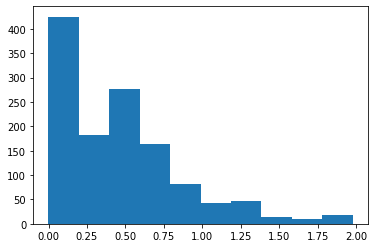

In [75]:

## compare the table to the uvqs database
with fits.open('https://archive.stsci.edu/missions/hlsp/uvqs/hlsp_uvqs_multi_multi_all_multi_v1_redshifts.fits', 
              cache=True) as f:
    uvqs_tab = Table.read(f)
add_coord_to_tab(uvqs_tab, raname='RA', decname='DEC')

# JT recommended this cut
uvqs_good_tab = uvqs_tab[uvqs_tab['Z_QUAL']>=3]
plt.hist(uvqs_tab['Z'])

uvqs_good_tab.show_in_notebook()

In [76]:
saga_qso_uvqs.add_column("False", name="uvqs-spec")

In [77]:
saga_qso_wise.add_column("False", name="uvqs-spec")

In [78]:
#uvqs cut
print("uvqs cut")
saga_qso_uvqs['uvqs-spec']='False'
for i in range(np.size(saga_qso_uvqs['RA-galex'])):

    candidate = SkyCoord(saga_qso_uvqs['RA-galex'][i]*u.deg,saga_qso_uvqs['DEC-galex'][i]*u.deg)
    for j in range(np.size(uvqs_good_tab['RA'])):
        qso_spec = SkyCoord(uvqs_good_tab['RA'][j]*u.deg,uvqs_good_tab['DEC'][j]*u.deg)
        sep = candidate.separation(qso_spec)
        if sep.arcmin < 1 :
            print(uvqs_good_tab['NAME'][j])
            saga_qso_uvqs['uvqs-spec'][i]="True"
print("wise cut")
saga_qso_wise['uvqs-spec']='False'
for i in range(np.size(saga_qso_wise['RA-galex'])):

    candidate = SkyCoord(saga_qso_wise['RA-galex'][i]*u.deg,saga_qso_wise['DEC-galex'][i]*u.deg)
    for j in range(np.size(uvqs_good_tab['RA'])):
        qso_spec = SkyCoord(uvqs_good_tab['RA'][j]*u.deg,uvqs_good_tab['DEC'][j]*u.deg)
        sep = candidate.separation(qso_spec)
        if sep.arcmin < 2 :
            print(uvqs_good_tab['NAME'][j]) 
            saga_qso_wise['uvqs-spec'][i]="True"

uvqs cut
UVQSJ003236.59-091026.4
UVQSJ003236.59-091026.4
UVQSJ134426.41+441620.1
UVQSJ170043.71+223700.2
UVQSJ170043.71+223700.2
UVQSJ092816.20+084139.2
UVQSJ122527.17-041857.4
UVQSJ140103.98+293132.1
UVQSJ140909.07-052338.4
UVQSJ141555.11-070528.6
UVQSJ212032.18-463143.8
UVQSJ215451.10-441405.7
UVQSJ234028.55-134631.9
UVQSJ234028.55-134631.9
UVQSJ233813.02-113548.0
UVQSJ233813.02-113548.0
wise cut
UVQSJ003236.59-091026.4
UVQSJ003236.59-091026.4
UVQSJ134426.41+441620.1
UVQSJ170043.71+223700.2
UVQSJ170043.71+223700.2
UVQSJ092816.20+084139.2
UVQSJ122527.17-041857.4
UVQSJ140103.98+293132.1
UVQSJ212032.18-463143.8
UVQSJ215451.10-441405.7


In [79]:
saga_qso_wise.show_in_notebook()

idx,saga-host,saga-RA,saga-DEC,galex-name,RA-galex,DEC-galex,FUV,NUV,RA-wise,DEC-wise,W1,W2,W3,W4,uvqs-spec
0,nsa126115,0.995382,20.7523559,6375982364126876148,1.581071189934832,20.20312635326189,15.209712,15.0787773,1.5814004,20.2029512,9.083,8.102,5.718,3.572,False
1,nsa127226,8.694936,-8.3964957,6380310083769729826,8.152429941684606,-9.17376026029961,16.2150345,15.82708,8.1524649,-9.1740022,10.465,9.314,6.238,3.892,True
2,nsa127226,8.694936,-8.3964957,2435323835028868285,8.152225088936454,-9.17394784348447,16.1414318,15.7238388,8.1524649,-9.1740022,10.465,9.314,6.238,3.892,True
3,nsa130133,24.7772265,-7.5126485,6380380388089400791,25.14291160509016,-6.895838823607241,16.45068,16.3472633,25.1430595,-6.8958642,11.078,10.1,7.686,5.28,False
4,nsa130133,24.7772265,-7.5126485,6380380398826818106,25.14289861264806,-6.89562047745061,16.198616,16.2759132,25.1430595,-6.8958642,11.078,10.1,7.686,5.28,False
5,nsa133115,45.910458,-15.6138572,2921853332273238613,46.05257584454185,-16.00766997672222,18.865366,18.5782318,46.052333,-16.0082924,14.295,13.318,8.929,5.571,False
6,nsa133115,45.910458,-15.6138572,6380837775262877331,46.05250828382209,-16.00774075612331,18.8281288,18.5339241,46.052333,-16.0082924,14.295,13.318,8.929,5.571,False
7,nsa133115,45.910458,-15.6138572,3073286869743568941,46.05256719456569,-16.00776538187762,18.9005642,18.55214,46.052333,-16.0082924,14.295,13.318,8.929,5.571,False
8,nsa133115,45.910458,-15.6138572,3128526333923034745,46.05259051975928,-16.00794248621128,18.9156,18.4545784,46.052333,-16.0082924,14.295,13.318,8.929,5.571,False
9,nsa133141,46.5125295,-15.6112493,2924386607063633771,46.84183057362667,-15.39300559822744,18.708662,18.6733341,46.8421264,-15.3925329,13.361,12.338,9.099,6.523,False


In [80]:
saga_qso_uvqs.show_in_notebook()

idx,saga-host,saga-RA,saga-DEC,galex-name,RA-galex,DEC-galex,FUV,NUV,RA-wise,DEC-wise,W1,W2,W3,W4,uvqs-spec
0,nsa126115,0.995382,20.7523559,6375982365200617245,0.8651088155931191,20.15538386357145,18.3421936,18.05785,0.8652257,20.1554198,13.295,12.271,9.788,7.313,False
1,nsa126115,0.995382,20.7523559,6375982358758164967,0.3429560194442184,20.74880506599254,18.8840065,18.31427,0.3430507,20.7487121,13.326,12.369,9.927,7.712,False
2,nsa126115,0.995382,20.7523559,6375982364126876148,1.581071189934832,20.20312635326189,15.209712,15.0787773,1.5814004,20.2029512,9.083,8.102,5.718,3.572,False
3,nsa126115,0.995382,20.7523559,6375982358758164049,0.1439928687507691,20.5456396508816,18.1625824,18.6677952,0.1509329,20.5438889,16.799,16.009,12.168,8.893,False
4,nsa126115,0.995382,20.7523559,6375982358758164922,0.02894700541540038,20.74149781606735,18.74911,18.94876,0.0285135,20.7378502,17.427,16.478,12.453,8.841,False
5,nsa126115,0.995382,20.7523559,2494574317626458922,0.02887915779149353,20.74124994518128,18.9406853,19.0245838,0.0285135,20.7378502,17.427,16.478,12.453,8.841,False
6,nsa127226,8.694936,-8.3964957,6380310082695990310,8.764188836703298,-8.57749260798108,18.7033615,17.9385719,8.7643791,-8.577809,14.2,13.048,10.167,7.718,False
7,nsa127226,8.694936,-8.3964957,2435464572517229218,8.764346110391125,-8.577605405867084,18.9652634,17.8957272,8.7643791,-8.577809,14.2,13.048,10.167,7.718,False
8,nsa127226,8.694936,-8.3964957,6380310075179794460,8.764443620138495,-8.577580524241132,18.92785,17.8064079,8.7643791,-8.577809,14.2,13.048,10.167,7.718,False
9,nsa127226,8.694936,-8.3964957,6380310083769729826,8.152429941684606,-9.17376026029961,16.2150345,15.82708,8.1524649,-9.1740022,10.465,9.314,6.238,3.892,True


In [81]:
saga_qso_uvqs.add_column("False", name="sdss-spec")
saga_qso_wise.add_column("False", name="sdss-spec")

In [82]:
### sdss spectra check

for i in range(np.size(saga_qso_uvqs['RA-galex'])):
    candidate = SkyCoord(saga_qso_uvqs['RA-galex'][i]*u.deg,saga_qso_uvqs['DEC-galex'][i]*u.deg)

    xid=SDSS.query_region(candidate, spectro=True)
    if xid != None:
        saga_qso_uvqs['sdss-spec'][i]="True"
        

for i in range(np.size(saga_qso_wise['RA-galex'])):
    candidate = SkyCoord(saga_qso_wise['RA-galex'][i]*u.deg,saga_qso_wise['DEC-galex'][i]*u.deg)

    xid=SDSS.query_region(candidate, spectro=True)
    if xid != None:
        saga_qso_wise['sdss-spec'][i]="True"        
    

/Users/ahamanowicz/opt/anaconda3/envs/astro/lib/python3.8/site-packages/astroquery/sdss/core.py:862: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/Users/ahamanowicz/opt/anaconda3/envs/astro/lib/python3.8/site-packages/astropy/table/table.py:3075: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


In [83]:
saga_qso_uvqs.show_in_notebook()

idx,saga-host,saga-RA,saga-DEC,galex-name,RA-galex,DEC-galex,FUV,NUV,RA-wise,DEC-wise,W1,W2,W3,W4,uvqs-spec,sdss-spec
0,nsa126115,0.995382,20.7523559,6375982365200617245,0.8651088155931191,20.15538386357145,18.3421936,18.05785,0.8652257,20.1554198,13.295,12.271,9.788,7.313,False,False
1,nsa126115,0.995382,20.7523559,6375982358758164967,0.3429560194442184,20.74880506599254,18.8840065,18.31427,0.3430507,20.7487121,13.326,12.369,9.927,7.712,False,False
2,nsa126115,0.995382,20.7523559,6375982364126876148,1.581071189934832,20.20312635326189,15.209712,15.0787773,1.5814004,20.2029512,9.083,8.102,5.718,3.572,False,False
3,nsa126115,0.995382,20.7523559,6375982358758164049,0.1439928687507691,20.5456396508816,18.1625824,18.6677952,0.1509329,20.5438889,16.799,16.009,12.168,8.893,False,False
4,nsa126115,0.995382,20.7523559,6375982358758164922,0.02894700541540038,20.74149781606735,18.74911,18.94876,0.0285135,20.7378502,17.427,16.478,12.453,8.841,False,False
5,nsa126115,0.995382,20.7523559,2494574317626458922,0.02887915779149353,20.74124994518128,18.9406853,19.0245838,0.0285135,20.7378502,17.427,16.478,12.453,8.841,False,False
6,nsa127226,8.694936,-8.3964957,6380310082695990310,8.764188836703298,-8.57749260798108,18.7033615,17.9385719,8.7643791,-8.577809,14.2,13.048,10.167,7.718,False,False
7,nsa127226,8.694936,-8.3964957,2435464572517229218,8.764346110391125,-8.577605405867084,18.9652634,17.8957272,8.7643791,-8.577809,14.2,13.048,10.167,7.718,False,False
8,nsa127226,8.694936,-8.3964957,6380310075179794460,8.764443620138495,-8.577580524241132,18.92785,17.8064079,8.7643791,-8.577809,14.2,13.048,10.167,7.718,False,False
9,nsa127226,8.694936,-8.3964957,6380310083769729826,8.152429941684606,-9.17376026029961,16.2150345,15.82708,8.1524649,-9.1740022,10.465,9.314,6.238,3.892,True,False


In [84]:
spec_mask_uvqs = (saga_qso_uvqs['uvqs-spec'] == 'False') & (saga_qso_uvqs['sdss-spec'] == 'False')
saga_qso_uvqs_nospec = saga_qso_uvqs[spec_mask_uvqs]

spec_mask_wise = (saga_qso_wise['uvqs-spec'] == 'False') & (saga_qso_wise['sdss-spec'] == 'False')
saga_qso_wise_nospec = saga_qso_wise[spec_mask_wise]

In [85]:
saga_qso_uvqs_nospec.show_in_notebook()

idx,saga-host,saga-RA,saga-DEC,galex-name,RA-galex,DEC-galex,FUV,NUV,RA-wise,DEC-wise,W1,W2,W3,W4,uvqs-spec,sdss-spec
0,nsa126115,0.995382,20.7523559,6375982365200617245,0.8651088155931191,20.15538386357145,18.3421936,18.05785,0.8652257,20.1554198,13.295,12.271,9.788,7.313,False,False
1,nsa126115,0.995382,20.7523559,6375982358758164967,0.3429560194442184,20.74880506599254,18.8840065,18.31427,0.3430507,20.7487121,13.326,12.369,9.927,7.712,False,False
2,nsa126115,0.995382,20.7523559,6375982364126876148,1.581071189934832,20.20312635326189,15.209712,15.0787773,1.5814004,20.2029512,9.083,8.102,5.718,3.572,False,False
3,nsa126115,0.995382,20.7523559,6375982358758164049,0.1439928687507691,20.5456396508816,18.1625824,18.6677952,0.1509329,20.5438889,16.799,16.009,12.168,8.893,False,False
4,nsa126115,0.995382,20.7523559,6375982358758164922,0.02894700541540038,20.74149781606735,18.74911,18.94876,0.0285135,20.7378502,17.427,16.478,12.453,8.841,False,False
5,nsa126115,0.995382,20.7523559,2494574317626458922,0.02887915779149353,20.74124994518128,18.9406853,19.0245838,0.0285135,20.7378502,17.427,16.478,12.453,8.841,False,False
6,nsa127226,8.694936,-8.3964957,6380310082695990310,8.764188836703298,-8.57749260798108,18.7033615,17.9385719,8.7643791,-8.577809,14.2,13.048,10.167,7.718,False,False
7,nsa127226,8.694936,-8.3964957,2435464572517229218,8.764346110391125,-8.577605405867084,18.9652634,17.8957272,8.7643791,-8.577809,14.2,13.048,10.167,7.718,False,False
8,nsa127226,8.694936,-8.3964957,6380310075179794460,8.764443620138495,-8.577580524241132,18.92785,17.8064079,8.7643791,-8.577809,14.2,13.048,10.167,7.718,False,False
9,nsa127226,8.694936,-8.3964957,6380310074106055052,9.575837330816773,-8.008252235067319,18.4804516,18.10026,9.5760305,-8.0085218,12.81,11.961,9.567,7.334,False,False


In [86]:
saga_qso_wise_nospec.show_in_notebook()

idx,saga-host,saga-RA,saga-DEC,galex-name,RA-galex,DEC-galex,FUV,NUV,RA-wise,DEC-wise,W1,W2,W3,W4,uvqs-spec,sdss-spec
0,nsa126115,0.995382,20.7523559,6375982364126876148,1.581071189934832,20.20312635326189,15.209712,15.0787773,1.5814004,20.2029512,9.083,8.102,5.718,3.572,False,False
1,nsa130133,24.7772265,-7.5126485,6380380388089400791,25.14291160509016,-6.895838823607241,16.45068,16.3472633,25.1430595,-6.8958642,11.078,10.1,7.686,5.28,False,False
2,nsa130133,24.7772265,-7.5126485,6380380398826818106,25.14289861264806,-6.89562047745061,16.198616,16.2759132,25.1430595,-6.8958642,11.078,10.1,7.686,5.28,False,False
3,nsa133115,45.910458,-15.6138572,2921853332273238613,46.05257584454185,-16.00766997672222,18.865366,18.5782318,46.052333,-16.0082924,14.295,13.318,8.929,5.571,False,False
4,nsa133115,45.910458,-15.6138572,6380837775262877331,46.05250828382209,-16.00774075612331,18.8281288,18.5339241,46.052333,-16.0082924,14.295,13.318,8.929,5.571,False,False
5,nsa133115,45.910458,-15.6138572,3073286869743568941,46.05256719456569,-16.00776538187762,18.9005642,18.55214,46.052333,-16.0082924,14.295,13.318,8.929,5.571,False,False
6,nsa133115,45.910458,-15.6138572,3128526333923034745,46.05259051975928,-16.00794248621128,18.9156,18.4545784,46.052333,-16.0082924,14.295,13.318,8.929,5.571,False,False
7,nsa133141,46.5125295,-15.6112493,2924386607063633771,46.84183057362667,-15.39300559822744,18.708662,18.6733341,46.8421264,-15.3925329,13.361,12.338,9.099,6.523,False,False
8,nsa133141,46.5125295,-15.6112493,3128526333923042395,46.84176805906801,-15.39282727255103,18.4134312,18.39973,46.8421264,-15.3925329,13.361,12.338,9.099,6.523,False,False
9,nsa133141,46.5125295,-15.6112493,6380837764525458540,46.84204686852065,-15.39236469537419,18.55689,18.5877914,46.8421264,-15.3925329,13.361,12.338,9.099,6.523,False,False


In [87]:
for i in range(np.size(saga_qso_uvqs_nospec['galex-name'])):
    print(saga_qso_uvqs_nospec['galex-name'][i], saga_qso_uvqs_nospec['RA-galex'][i],
          saga_qso_uvqs_nospec['DEC-galex'][i], i, saga_qso_uvqs_nospec['saga-host'][i],
          saga_qso_uvqs_nospec['FUV'][i], saga_qso_uvqs_nospec['NUV'][i])
    
    
    

6375982365200617245 0.8651088155931191 20.15538386357145 0 nsa126115 18.3421936 18.05785
6375982358758164967 0.3429560194442184 20.74880506599254 1 nsa126115 18.8840065 18.31427
6375982364126876148 1.581071189934832 20.20312635326189 2 nsa126115 15.209712 15.0787773
6375982358758164049 0.1439928687507691 20.5456396508816 3 nsa126115 18.1625824 18.6677952
6375982358758164922 0.02894700541540038 20.74149781606735 4 nsa126115 18.74911 18.94876
2494574317626458922 0.02887915779149353 20.74124994518128 5 nsa126115 18.9406853 19.0245838
6380310082695990310 8.764188836703298 -8.57749260798108 6 nsa127226 18.7033615 17.9385719
2435464572517229218 8.764346110391125 -8.577605405867084 7 nsa127226 18.9652634 17.8957272
6380310075179794460 8.764443620138495 -8.577580524241132 8 nsa127226 18.92785 17.8064079
6380310074106055052 9.575837330816773 -8.008252235067319 9 nsa127226 18.4804516 18.10026
6380204504883663043 20.91154107575452 13.16254757971935 10 nsa129387 18.8070221 17.8468323
6380204495219

In [72]:
for i in range(np.size(saga_qso_wise_nospec['galex-name'])):
    print(saga_qso_wise_nospec['galex-name'][i], saga_qso_wise_nospec['RA-galex'][i],
          saga_qso_wise_nospec['DEC-galex'][i], i, saga_qso_wise_nospec['saga-host'][i],
          saga_qso_wise_nospec['FUV'][i], saga_qso_wise_nospec['NUV'][i])

6375982364126876148 1.581071189934832 20.20312635326189 0 nsa126115 15.209712 15.0787773
6380380388089400791 25.14291160509016 -6.895838823607241 1 nsa130133 16.45068 16.3472633
6380380398826818106 25.14289861264806 -6.89562047745061 2 nsa130133 16.198616 16.2759132
2921853332273238613 46.05257584454185 -16.00766997672222 3 nsa133115 18.865366 18.5782318
6380837775262877331 46.05250828382209 -16.00774075612331 4 nsa133115 18.8281288 18.5339241
3073286869743568941 46.05256719456569 -16.00776538187762 5 nsa133115 18.9005642 18.55214
3128526333923034745 46.05259051975928 -16.00794248621128 6 nsa133115 18.9156 18.4545784
2924386607063633771 46.84183057362667 -15.39300559822744 7 nsa133141 18.708662 18.6733341
3128526333923042395 46.84176805906801 -15.39282727255103 8 nsa133141 18.4134312 18.39973
6380837764525458540 46.84204686852065 -15.39236469537419 9 nsa133141 18.55689 18.5877914
2921853332273238613 46.05257584454185 -16.00766997672222 10 nsa133141 18.865366 18.5782318
3073286869743568